<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-лишних-даных" data-toc-modified-id="Удаление-лишних-даных-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Удаление лишних даных</a></span></li><li><span><a href="#Кодирование-признаков" data-toc-modified-id="Кодирование-признаков-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Кодирование признаков</a></span></li><li><span><a href="#Нормализация-заголовков-колонок" data-toc-modified-id="Нормализация-заголовков-колонок-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Нормализация заголовков колонок</a></span></li><li><span><a href="#Удаление-пропусков" data-toc-modified-id="Удаление-пропусков-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Удаление пропусков</a></span></li><li><span><a href="#Обработка-выбросов" data-toc-modified-id="Обработка-выбросов-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Обработка выбросов</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Итоги-по-предобработке" data-toc-modified-id="Итоги-по-предобработке-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span>Итоги по предобработке</a></span></li></ul></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Модель-со-взвешиванием-классов" data-toc-modified-id="Модель-со-взвешиванием-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель со взвешиванием классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Поиск-оптимальной-модели" data-toc-modified-id="Поиск-оптимальной-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Поиск оптимальной модели</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Лес-решений" data-toc-modified-id="Лес-решений-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Лес решений</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоги</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Анализ данных

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


* **RowNumber, Surname, CustomerId** - эти данные интересны только в контексте системы, из которой они были получены. Для обучения они не имеют смысла и должны быть удалены.
* Наименования колонок требуют нормализации (нижний регистр, земля между словами).
* Есть пустые значения в колонке **Tenure**.

In [3]:
df['Exited'].unique()

array([1, 0])

* В целевой колонке (**Exited**) нет посторонних данных. Предобработка не требуется

In [4]:
categorial_columns = [
    'Geography', 
    'Gender',
    'HasCrCard', 
    'IsActiveMember'
]

for column in df.columns:    
    if column in categorial_columns:
        print(column, df[column].unique()[:10])

Geography ['France' 'Spain' 'Germany']
Gender ['Female' 'Male']
HasCrCard [1 0]
IsActiveMember [1 0]


* **Geography, Gender** - категориальные данные - требуют кодирования.
* **HasCrCard** и **IsActiveMemeber** - тоже категориальные, но уже закодированы и не требуют предобработки.

* Дубликаты искать нет смысла - позже потребуется дублировать часть данных для выравнивания баланса классов

### Предобработка данных

#### Удаление лишних даных

In [5]:
useless_columns = ['CustomerId', 'Surname', 'RowNumber']
df = df.loc[:, ~df.columns.isin(useless_columns)]

#### Кодирование признаков

In [6]:
def replace_with_dummy(data_frame, column):
    if(column not in data_frame.columns):
        return data_frame
    
    dummy = pd.get_dummies(data_frame[column], drop_first=True, prefix=column)
    data_frame = data_frame.join(dummy)
    return data_frame.loc[:, ~data_frame.columns.isin([column])]    

In [7]:
df = replace_with_dummy(df, 'Gender')
df = replace_with_dummy(df, 'Geography')
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


#### Нормализация заголовков колонок

In [8]:
columns_renamings = {
    'CreditScore': 'Credit_Score',
    'NumOfProducts': 'Num_Of_Products',
    'HasCrCard': 'Has_Cr_Card',
    'IsActiveMember': 'Is_Active_Member',
    'EstimatedSalary': 'Estimated_Salary'
}

df = df.rename(columns=columns_renamings)
df.columns = df.columns.str.lower()

#### Удаление пропусков

In [9]:
print(df['tenure'].unique())

[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]


Не похоже, что nan = 0 - нули идут отдельно. Возможно, ошибка в выборке.

Замена на среднее или медиану создаст большой всплеск. Так что, безопаснее такие строки удалить.

In [10]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       9091 non-null   int64  
 1   age                9091 non-null   int64  
 2   tenure             9091 non-null   float64
 3   balance            9091 non-null   float64
 4   num_of_products    9091 non-null   int64  
 5   has_cr_card        9091 non-null   int64  
 6   is_active_member   9091 non-null   int64  
 7   estimated_salary   9091 non-null   float64
 8   exited             9091 non-null   int64  
 9   gender_male        9091 non-null   uint8  
 10  geography_germany  9091 non-null   uint8  
 11  geography_spain    9091 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 736.9 KB


#### Обработка выбросов

       credit_score          age       tenure        balance  num_of_products  \
count   9091.000000  9091.000000  9091.000000    9091.000000      9091.000000   
mean     650.736553    38.949181     4.997690   76522.740015         1.530195   
std       96.410471    10.555581     2.894723   62329.528576         0.581003   
min      350.000000    18.000000     0.000000       0.000000         1.000000   
25%      584.000000    32.000000     2.000000       0.000000         1.000000   
50%      652.000000    37.000000     5.000000   97318.250000         1.000000   
75%      717.000000    44.000000     7.000000  127561.890000         2.000000   
max      850.000000    92.000000    10.000000  250898.090000         4.000000   

       estimated_salary  
count       9091.000000  
mean      100181.214924  
std        57624.755647  
min           11.580000  
25%        51227.745000  
50%       100240.200000  
75%       149567.210000  
max       199992.480000  


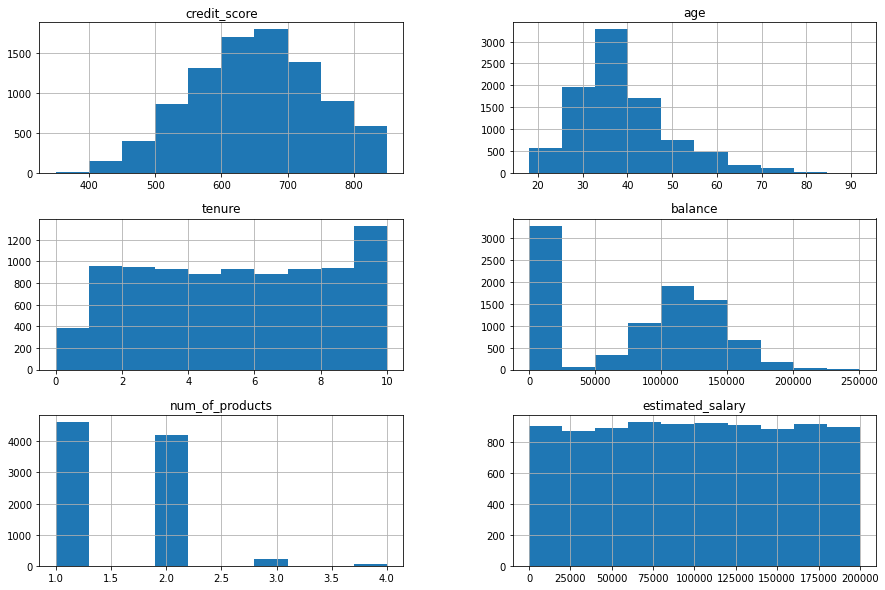

In [11]:
numeric_columns = [
    'credit_score', 
    'age', 
    'tenure', 
    'balance', 
    'num_of_products',
    'estimated_salary'
]

print(df[numeric_columns].describe())
df[numeric_columns].hist(figsize=(15,10));

Для всех значений медианы близки к среднему, а распределение либо нормальное, либо равномерное.

Единственный выброс наблюдается в балансе на счёте. Выброс представлен большим количеством нулевых значений. Но это легко объясняется тем, что многие люди просто не держат деньги на счете. Если убрать выброс нулей, то и баланс будет выглядеть как нормальное распеределение.

Данные не требуют устранения выбросов.

#### Масштабирование признаков

В данных есть значения, представленные в единицах (количество продуктов), а есть представленные в десятках тысяч (баланс). Поэтому, требуется масштабирование признаков, которое будет проведено после разбивки данных на выборки.

#### Итоги по предобработке

* Из данных были исключены идентификаторы строк и людей.
* Проведена нормализация заголовков колонок.
* Были удалены строки с пустым значением **Tenure**.
* Не было обнаружено выбросов данных.
* Часть категориальных данных (**Geography, Gender**) потребовала кодирования, часть (**HasCrCard**, **IsActiveMemeber**) - не потребовала.
* Проведено масштабирование признаков.

## Исследование задачи

In [12]:
random_state = 12345

In [13]:
target = df['exited']
features = df.drop('exited', axis=1)

#train/test/valid:60%/20%/20%
features_train_valid, features_test, target_train_valid, target_test = train_test_split(
    features,
    target,
    test_size=0.20,
    random_state=random_state,
    stratify=target
)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_valid,
    target_train_valid,
    test_size=0.25,
    random_state=random_state,
    stratify=target_train_valid
)

print('Баланс классов:')
target.value_counts()

Баланс классов:


0    7237
1    1854
Name: exited, dtype: int64

Наблюдается существенный перекос в сторону отрицательного класса.

In [14]:
#Масштабирование признаков
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric_columns])
features_train[numeric_columns] = scaler.transform(features_train[numeric_columns])
features_valid[numeric_columns] = scaler.transform(features_valid[numeric_columns])
features_test[numeric_columns] = scaler.transform(features_test[numeric_columns])

features_train_valid = pd.concat([features_train, features_valid])
target_train_valid = pd.concat([target_train, target_valid])

#PredefinedSplit необходим для GridSearchCV
#Так в GridSearchCV можно использовать заранее созданные выборки features/target, 
#а не внутренний механизм разбивки самого GridSearchCV
split_index = [-1 if x in features_train.index else 0 for x in features_train_valid.index]
pds = PredefinedSplit(test_fold = split_index)

In [15]:
def test_model(search_model):
    print('Лучшая модель:', search_model.best_estimator_)
    results = search_model.cv_results_
    best_index = search_model.best_index_
    f1 = search_model.best_score_
    roc_auc = results["mean_test_roc_auc"][best_index]    
    
    size = 10000
    confusion_matrix_encoded = results["mean_test_confusion_matrix"][best_index]
    tp = int(confusion_matrix_encoded % size)
    fn = int(confusion_matrix_encoded / size) % size
    fp = int(confusion_matrix_encoded / (size**2)) % size
    tn = int(confusion_matrix_encoded / (size**3))
    confusion_matrix_decoded =np.array([
        [tn, fp],
        [fn, tp]
    ])
    
    print('F1:', f1) 
    print('ROC AUC:', roc_auc)
    print('Матрица ошибок:')
    print(confusion_matrix_decoded)

In [16]:
def confusion_matrix_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    size = 10000
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]
    result = (size**3)*tn + (size**2)*fp + size*fn + tp
    return result

grid_search_scoring = {
    'f1':'f1',
    'roc_auc':'roc_auc',
    'confusion_matrix': confusion_matrix_scorer
}

In [17]:
%%time
best_decision_tree_search = GridSearchCV(
    DecisionTreeClassifier(random_state=random_state),
    {
        'criterion': ['gini', 'entropy'],
        'max_features': ['auto', 'sqrt', 'log2', None],
        'max_leaf_nodes': range(10, 50, 10),
        'max_depth': range(10, 50, 10),
    },
    cv=pds,
    refit='f1',
    scoring = grid_search_scoring
)
_ = best_decision_tree_search.fit(features_train_valid, target_train_valid)

CPU times: user 2.14 s, sys: 0 ns, total: 2.14 s
Wall time: 2.14 s


In [18]:
test_model(best_decision_tree_search)

Лучшая модель: DecisionTreeClassifier(max_depth=10, max_leaf_nodes=40, random_state=12345)
F1: 0.5811688311688312
ROC AUC: 0.8345447500824273
Матрица ошибок:
[[1381   66]
 [ 192  179]]


Судя по ROC AUC, получившаяся модель далека от случайной. Но этого недостаточно: F1 не дотягивает до целевого значения. Модель слишком редко дает положительные ответы (это было предсказуемо из-за дисбаланса).

## Борьба с дисбалансом

### Модель со взвешиванием классов

In [19]:
best_decision_tree_search = GridSearchCV(
    DecisionTreeClassifier(random_state=random_state, class_weight='balanced'),
    {
        'criterion': ['gini', 'entropy'],
        'max_features': ['auto', 'sqrt', 'log2', None],
        'max_leaf_nodes': range(10, 50, 10),
        'max_depth': range(10, 50, 10),
    },
    cv=pds,
    refit='f1',
    scoring=grid_search_scoring
)
_ = best_decision_tree_search.fit(features_train_valid, target_train_valid)

In [20]:
test_model(best_decision_tree_search)

Лучшая модель: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_leaf_nodes=30, random_state=12345)
F1: 0.5711382113821138
ROC AUC: 0.8431143904015559
Матрица ошибок:
[[1115  332]
 [  90  281]]


In [21]:
target_valid.value_counts()

0    1447
1     371
Name: exited, dtype: int64

Взвешивание классов не позволило существенно улучшить качество прогнозирования модели. Теперь модель чаще дает положительные ответы, но в половине случаев - ошибочно.

### Увеличение выборки

Исходных данных мало (всего 10000 записей) - поэтому, для исправления дисбаланса можно дополнить данные (а downsampling может только ухудшить результат).

In [22]:
def upsample(features, target, target_filter, repeat):
    features_filtered = features[target_filter]
    features_unfiltered = features[~target_filter]
    target_filtered = target[target_filter]
    target_unfiltered = target[~target_filter]
    
    features_upsampled = pd.concat([features_unfiltered] + [features_filtered] * repeat)
    target_upsampled = pd.concat([target_unfiltered] + [target_filtered] * repeat)
    
    return shuffle(features_upsampled, target_upsampled, random_state=random_state)

In [23]:
features_upsampled, target_upsampled = upsample(features_train, target_train, target_train == 1, 3)
print('Баланс классов:')
print(target_upsampled.value_counts())

Баланс классов:
0    4342
1    3336
Name: exited, dtype: int64


In [24]:
features_upsampled_valid = pd.concat([features_upsampled, features_valid]) 
target_upsampled_valid = pd.concat([target_upsampled, target_valid]) 

split_index = [-1 if x in features_upsampled.index else 0 for x in features_upsampled_valid.index]
pds = PredefinedSplit(test_fold = split_index)

In [25]:
%%time
best_decision_tree_search = GridSearchCV(
    DecisionTreeClassifier(random_state=random_state),
    {
        'criterion': ['gini', 'entropy'],
        'max_features': ['auto', 'sqrt', 'log2', None],
        'max_leaf_nodes': range(10, 50, 10),
        'max_depth': range(10, 50, 10),
    },
    cv=pds,
    refit='f1',
    scoring=grid_search_scoring
)
_ = best_decision_tree_search.fit(features_upsampled_valid, target_upsampled_valid)

CPU times: user 2.34 s, sys: 11.2 ms, total: 2.35 s
Wall time: 2.36 s


In [26]:
test_model(best_decision_tree_search)

Лучшая модель: DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30, random_state=12345)
F1: 0.5928411633109619
ROC AUC: 0.8416660923147995
Матрица ошибок:
[[1189  258]
 [ 106  265]]


Увеличение выборки помогло достигнуть целевого показателя F1. Хотя матрица ошибок по-прежнему показывает много ошибок при прогнозировании положительных ответов.

### Поиск оптимальной модели

#### Дерево решений

In [27]:
test_model(best_decision_tree_search)

Лучшая модель: DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30, random_state=12345)
F1: 0.5928411633109619
ROC AUC: 0.8416660923147995
Матрица ошибок:
[[1189  258]
 [ 106  265]]


#### Лес решений

In [28]:
%%time

best_random_forest_search = GridSearchCV(
    RandomForestClassifier(random_state=random_state),
    {
        'criterion': ['gini', 'entropy'],
        'max_features': ['auto', 'sqrt', 'log2', None],
        'max_leaf_nodes': range(20, 40, 10),
        'max_depth': range(20, 40, 10),
        'n_estimators': range(10, 40, 10)
    },
    cv=pds,
    refit='f1',
    scoring=grid_search_scoring
)
_ = best_random_forest_search.fit(features_upsampled_valid, target_upsampled_valid)

CPU times: user 15.2 s, sys: 26.1 ms, total: 15.2 s
Wall time: 15.2 s


In [29]:
test_model(best_random_forest_search)

Лучшая модель: RandomForestClassifier(max_depth=20, max_leaf_nodes=20, n_estimators=10,
                       random_state=12345)
F1: 0.6118251928020565
ROC AUC: 0.8550071995782706
Матрица ошибок:
[[1278  169]
 [ 133  238]]


Лес выдал немного лучший результат, чем дерево

## Тестирование модели

In [32]:
best_model = best_decision_tree_search
prediction_test = best_model.predict(features_test)
probabilites = best_model.predict_proba(features_test)

print('F1:', f1_score(target_test, prediction_test))
print('AUC ROC:', roc_auc_score(target_test, probabilites[:, 1]))
print('Матрица ошибок:')
print(confusion_matrix(target_test, prediction_test))

F1: 0.6165605095541402
AUC ROC: 0.8430831260889637
Матрица ошибок:
[[1276  172]
 [ 129  242]]


## Итоги

* Исходные данные оказались высокого качества. 
* Единственная проблема была в пустых значениях колонки **Tenure** (возможно, ошибка в выборке). Такие строки были удалены. 
* В ходе исследования моделей выявлен большой дисбаланс в сторону отрицательного класса, приводивший к недостаточному значению F1 метрики.
* С дисбалансом помогло справиться увеличение выборки (однако, для модели логистической регрессии этого оказалось недостаточно).
* Лучшей моделью стал лес решений, показавший на тестовой выборке метрику **F1 = 0.61**.